# Lab 2 – Essential Tools and Practices for Programming Projects in AI

Author: Rim Slama Salmi

Last modified: September 14, 2025

**Objectives**
- Manage virtual environments properly (with Conda or venv) to ensure reproducibility.
- Set up a Python project following best practices.
- Use Git and GitHub to ensure collaborative project tracking.
- Apply collaborative work with branch management and conflict resolution
  
**Resources**

- [Getting started with VS Code](https://code.visualstudio.com/docs/getstarted/getting-started)  
- [Create a conda environment in the terminal](https://code.visualstudio.com/docs/python/environments#_create-a-conda-environment-in-the-terminal)  
- [Git management in Visual Studio Code](https://code.visualstudio.com/docs/sourcecontrol/overview)  



## 01 - Project setup (virtual env & Git/Github)

### 1.1 Load and open the project folder in VS Code
- Load DSPAP_Lab2 from Moodle
- Rename it to **DSPAP_Lab2_YourName**
- Open **VS Code** → `File` → `Open Folder…` → select **DSPAP_Lab2_YourName**  


### 1.2 Activate Lab2 environment or create it from `.yml` file  

- In the VS Code terminal, make sure you have a dedicated environment for **Lab2**.  

👉 If it does not exist yet, create it with:  
- Option 1: If you already have a Lab2.yml file, you can recreate the environment directly:
```bash
conda env create -f Lab2.yml
```
- Option2: Create it for the first time with:  
```bash
conda create -n Lab2_yourName python=3.11 numpy pandas matplotlib pyyaml scikit-learn ipykernel
```



### 1.3 Start version control
- VS Code interface: open the Source Control panel → Initialize Repository → Stage → Commit

- Command line:
```bash
    git init
    git add .
    git commit -m "Initial commit"
```

### 1.4 Connect to GitHub
- Publish repository from VS Code → choose your account → set Private visibility


### 1.5 Add a .gitignore (if not already)
- Create a .gitignore file and include:*.txt
- Commit with message

### 1.6 Sync changes to GitHub
- In the Source Control panel, click Sync Changes (🔄)

 
## 2 – Best Practices in AI Project Management & Code
⚠️ All operations must be tracked with explicit commits.


- This lab uses a reduced subset of the Open Food Facts (France) database, which you already worked with in Lab 1.
- For this session, we focus on a France-specific subset containing selected columns on metadata, nutrients, and scores.
- The dataset provided (cleaned.csv) has already been cleaned, with missing values removed.

In [1]:
#Imports 
# THIS CELL IS ONLY FOR IMPORTS DO NOT CHANGE IT
import os, numpy as np, pandas as pd, matplotlib.pyplot as plt
from pathlib import Path
import yaml
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [2]:
#paths
DATASET_PATH="../data/data_cleaned.csv"
YML_path = "../config/config.yaml"

### 2.1 Project organization

👉 Instruction:  
- Rename your project folder to **DSPAP_Lab2_YourName** (*replace `YourName` with your own name*).  
- If some of your files have names that are not meaningful (e.g. `test1.ipynb`, `data123.csv`), **rename them with clear, descriptive names** (e.g. `data_cleaned.csv`, `analysis.ipynb`).  
- Then, place your files into a clean and consistent folder structure, here an example of good structure:

  
    DSPAP_Lab2/

    ├─ data/           # datasets

    ├─ notebooks/      # Jupyter notebooks

    ├─ src/            # Python modules (.py)

    ├─ config/         # configuration files

    └─ README.md


### 2.2 **Load** the dataset from cleaned.csv, **display** a few sample rows, and **check** the shape of the data (number of rows and columns).
Load the CSV into a DataFrame `df`. 
 Use the `pd.read_csv()` function. 

 Explore it 

In [3]:
# TODO 2.2
# 1. Load the dataset from 'cleaned.csv' into a DataFrame (use pandas)
df= pd.read_csv(DATASET_PATH)
# 2. Display the first few rows of the dataset
print(df.head(1))
# 3. Print the shape of the dataset (rows, columns)
print("Shape of dataset:", df.shape)

           product_name        brands  pnns_groups_1       pnns_groups_2  \
0  Madeleines ChocoLait  Apple bandit  Sugary snacks  Biscuits and cakes   

   energy-kcal_100g  sugars_100g  fat_100g  saturated-fat_100g  salt_100g  \
0             460.0         31.0      24.0                 6.0       0.48   

   fiber_100g  proteins_100g nutriscore_grade  nova_group  \
0         1.4            6.4                e         4.0   

  environmental_score_grade  unique_scans_n  
0                         d             1.0  
Shape of dataset: (121501, 15)


### 2.2 Remember and execute PCA main operations from TP1 


From the full dataset, we now focus on a subset of **nutritional features** that will be used for analysis and modeling.  
We create a clean DataFrame with only these columns, extract the underlying numerical values into a NumPy array `X`, and check its shape (rows × columns).

1. **Select features**  
   - Nutrients: `sugars_100g`, `fat_100g`, `salt_100g`, `proteins_100g`, `energy-kcal_100g`, `fiber_100g`  
   - Drop rows with missing values before building the feature matrix.

2. **Standardize**  
   - Use `StandardScaler` to center and scale features.  
   - Standardization is important because nutrients are in different units (g, kcal, etc.).  
   - 📖 [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

3. **Fit PCA**  
   - Run `PCA()` on the standardized data.  
   - Plot both the explained variance ratio (per component) and the cumulative ratio.  
   - These show how much information each principal component captures.  
   - 📖 [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

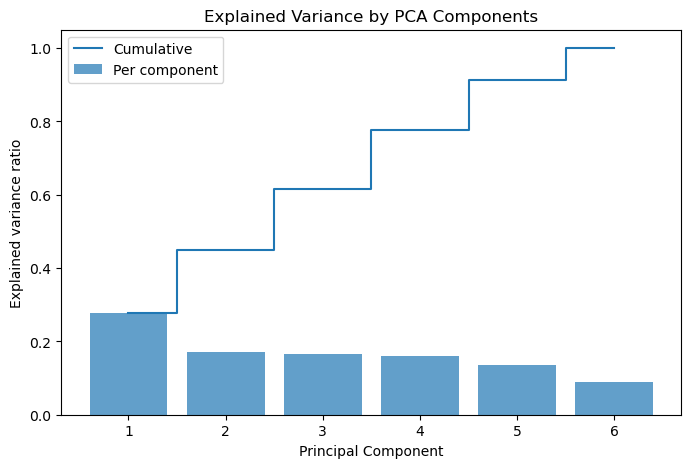

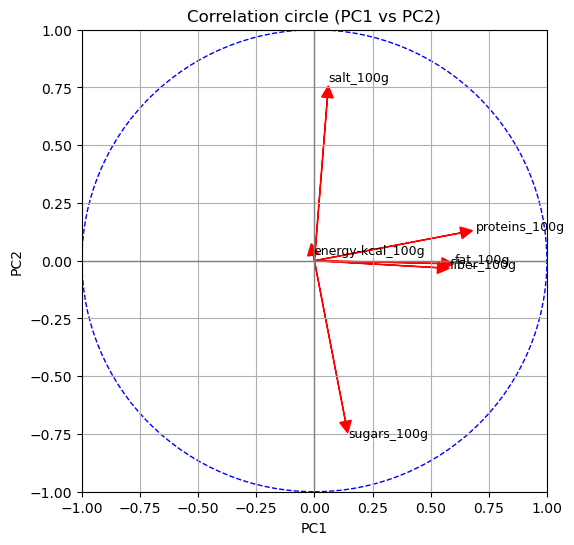

In [4]:
#(run this cell)
# 1. Select features
features = ["sugars_100g", "fat_100g", "salt_100g",
            "proteins_100g", "energy-kcal_100g", "fiber_100g"]

X = df[features].dropna()

# 2. Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Fit PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
explained_var = pca.explained_variance_ratio_
plt.figure(figsize=(8,5))
plt.bar(range(1, len(explained_var)+1), explained_var, alpha=0.7, label="Per component")
plt.step(range(1, len(explained_var)+1), np.cumsum(explained_var), where="mid", label="Cumulative")
plt.xlabel("Principal Component")
plt.ylabel("Explained variance ratio")
plt.legend()
plt.title("Explained Variance by PCA Components")
plt.show()
pcs = pca.components_
plt.figure(figsize=(6,6))
for i, feature in enumerate(features):
    plt.arrow(0, 0, pcs[0, i], pcs[1, i], head_width=0.05, head_length=0.05, fc='red', ec='red')
    plt.text(pcs[0, i]*1.1, pcs[1, i]*1.1, feature, fontsize=9)

plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)
circle = plt.Circle((0,0), 1, color='blue', fill=False, linestyle='--')
plt.gca().add_artist(circle)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Correlation circle (PC1 vs PC2)")
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.grid()
plt.show()

### 2.3 Display PCA correlation circle (axes 1–2) from TP1.

In [5]:
#(run this cell)
#code from solution goes here

### 2.4 Write a commented function to automate correlation circle display and give example usage for axes 1–2, 2–3, 1-3.
💡 *Hints & Recommendations:*  
- Use **snake_case** for the function name and variables.
- Add a **docstring** at the start of your function explaining what it does, its inputs, and outputs.  
- Comment important steps inside the function (data extraction, plotting, labeling).  
- Test your function with different axes combinations: (1–2), (2–3), (1–3).  
  
Here’s how to write a clean and well-documented function that adds two numbers:
```python
def add_two_numbers(a, b):
    """
    Return the sum of two numbers.

    Parameters
    ----------
    a : int or float
        First number.
    b : int or float
        Second number.

    Returns
    -------
    int or float
        The sum of a and b.
    """
    # Add the two inputs
    result = a + b

    # Return the result
    return result
```
Example usage
```python
print(add_two_numbers(3, 5))     # 8
```

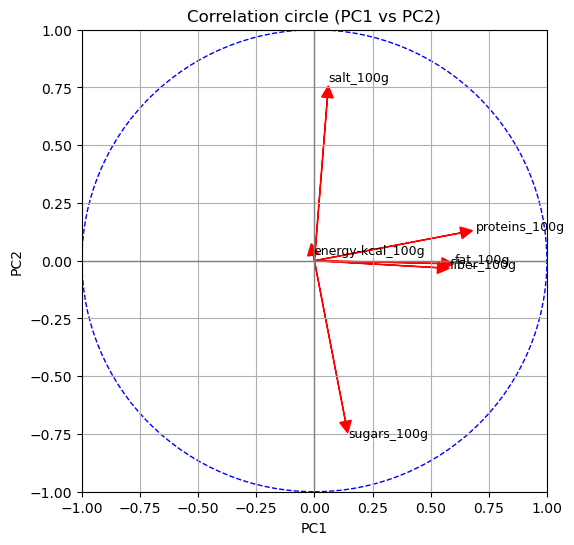

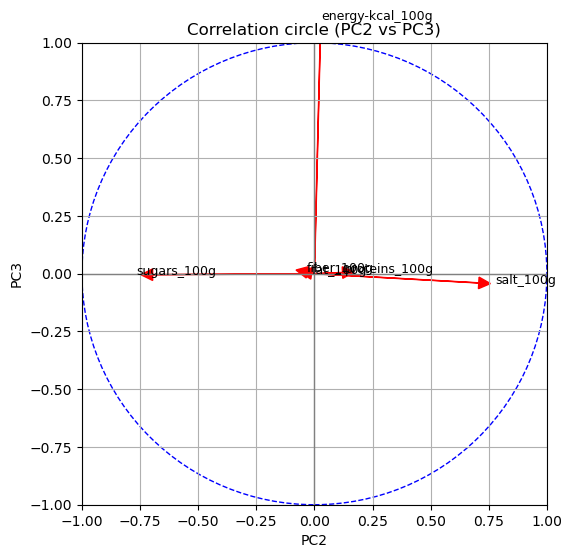

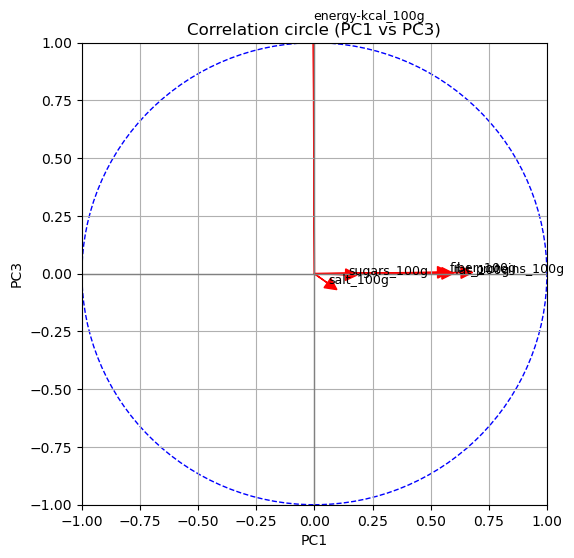

In [6]:


def plot_correlation_circle(df, features, axis1=1, axis2=2):
    """
    Standardize features, fit PCA, and plot correlation circle for two chosen axes.

    Parameters
    ----------
    df : pandas.DataFrame
        Data containing the features.
    features : list of str
        List of feature column names to include in PCA.
    axis1 : int, optional (default=1)
        First principal component axis to plot (1-based index).
    axis2 : int, optional (default=2)
        Second principal component axis to plot (1-based index).

    Returns
    -------
    None
        Displays explained variance bar plot and correlation circle.
    """
    # 1. Select features and drop missing values
    X = df[features].dropna()

    # 2. Standardize
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # 3. Fit PCA
    pca = PCA()
    X_pca = pca.fit_transform(X_scaled)
 

    # Correlation circle
    pcs = pca.components_
    x_axis = axis1 - 1
    y_axis = axis2 - 1

    plt.figure(figsize=(6,6))
    for i, feature in enumerate(features):
        plt.arrow(0, 0, pcs[x_axis, i], pcs[y_axis, i], 
                  head_width=0.05, head_length=0.05, fc='red', ec='red')
        plt.text(pcs[x_axis, i]*1.1, pcs[y_axis, i]*1.1, feature, fontsize=9)

    plt.axhline(0, color='grey', lw=1)
    plt.axvline(0, color='grey', lw=1)
    circle = plt.Circle((0,0), 1, color='blue', fill=False, linestyle='--')
    plt.gca().add_artist(circle)
    plt.xlabel(f"PC{axis1}")
    plt.ylabel(f"PC{axis2}")
    plt.title(f"Correlation circle (PC{axis1} vs PC{axis2})")
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.grid()
    plt.show()

    
# try it  PCA components axes 1–2, 2–3, and 1–3
features = ["sugars_100g", "fat_100g", "salt_100g","proteins_100g", "energy-kcal_100g", "fiber_100g"]

# axes 1–2
plot_correlation_circle(df, features, axis1=1, axis2=2)

# axes 2-3
plot_correlation_circle(df, features, axis1=2, axis2=3)

# axes 1-3
plot_correlation_circle(df, features, axis1=1, axis2=3)


### 2.4 Place the function inside the corresponding folder, in a dedicated Python module. 

In [7]:
####TODO
#Write here the **name of your file** where you put the function and its **location** in the project structure
# File name : pca_tools.py
# Location  : src/


### 2.5  Import the function you created from the Python file in the `src/` folder.  Call it to display the **correlation circle for PCA axes 1 and 3**.  

💡 Example of importing a function from a Python module
  ```python
  from folder.module_name import function_name
```
💡 Recommendation:
To avoid errors if the file or function is not found, wrap your import in a try/except block


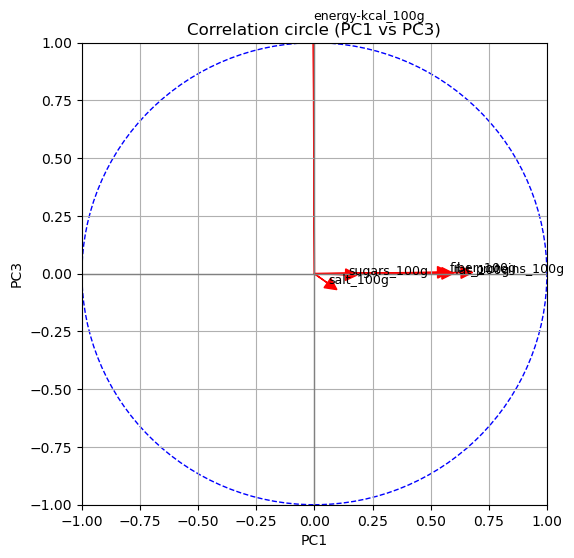

In [11]:
### TODO
#ne perfect because src is in notebook
try:
    from src.pca_tools import plot_correlation_circle
    plot_correlation_circle(df, features, axis1=1, axis2=3)
except ModuleNotFoundError as e:
    print("Import error: check that 'pca_tools.py' is in the 'src/' folder'")
    print(e)
except AttributeError as e:
    print("Error: Function 'plot_correlation_circle' not found in 'pca_tools.py'")
    print(e)



### 2.6 Update notebook to read CSV path and number of PCA components from config.yaml
- **Reload** the dataset from the path specified in YAML.  
- Get `data_path` and `n_components` from config  
- **Redo** the **PCA** on your feature matrix `X` using the number of components defined in YAML and display the new dataset with the proposed n_components.  

- Tuto
📘 [Working with YAML in Python (blog.stephane-robert.info)](https://blog.stephane-robert.info/docs/developper/programmation/python/yaml/)  


In [9]:

### TODO 2.6

# - Load `config/config.yaml` with yaml.safe_load  
# - Get `data_path` and `n_components` from config  
# - Use them when reading CSV and fitting PCA  

NewDataset2 = pd.DataFrame(pca2.components_.T, index=feats, columns=[f"PC{i+1}" for i in range(pca.components_.shape[0])])
display('NewDataset',NewDataset)

NameError: name 'pca2' is not defined

### 2.7 Create a README.md with the title: **Essential Tools and Practices for Programming Projects in AI**
📝 A simple guide to get started with markdown:  
[Markdown Basic Syntax (markdownguide.org)](https://www.markdownguide.org/basic-syntax/)

In [ ]:
#TODO
#Create a README.md with the title: **Essential Tools and Practices for Programming Projects in AI**

## 3 – Collaboration and Sharing with Git/GitHub

### 3.1 Share the project
•	Student 1 shares their GitHub project and adds Student 2 as collaborator.
•	Student 2 clones the project.


### 3.2 Create the environment
•	Inside VS Code terminal:
•	conda env create -f environment.yml
•	conda activate Lab2_name


### 3.3 Collaborative work (on Student 1’s project)
•	From now on, each pair works only on Student 1’s project.
•	Student 1 and Student 2 create separate branches to collaboratively write the README:

- Branch feature1_projectInfo (Student 1):
  - Project Title & Description – what the project does
  - Author(s) – contributors and contact info
  - Citation/License – mention that this comes from Angelo Furno’s course
- Branch feature2_projectSetUp (Student 2):
  - Installation – environment setup (Lab2_name)
  - Usage – how to run notebooks
  - Results – main outputs/metrics (optional)
  - Project Structure – short folder overview



### 3.4 Sync & merge
•	Push contributions to GitHub.
•	Merge branches into main to obtain a complete README.
•	Handle merge conflicts directly in VS Code if needed.


### 3.5 Practice: working with branchs

- Create a new branch (e.g. `save_pca`) from your main branch.  
- On this branch, add the option to **save the PCA-reduced dataset** with 4 components into a CSV file.  
- Commit your changes and push the branch.  
- Later, you can merge this branch into `main` if everything works correctly.  

### 3.5 (Optional) Organizing Work into Functionalities and Branches
- Go back to your TP1 project. 
- Identify 3 to 4 main functionalities. 
- Team up with one or two colleagues, assign the functionalities among you, and develop each one in a separate branch. 
- Once the work is done, merge all the branches into the main project.

## 4 – Reflection on AI and Ethics

### Ethical Reflection Exercise  

**Context:**  
A company wants to use the **Open Food Facts dataset (France)** to build an AI system that recommends food products to consumers.  
The dataset includes nutritional values, NutriScore grades, environmental scores, and brand information.  

**Objective:**  
Help consumers make healthier and more sustainable food choices.  

**Task (20 minutes):**  
Work in groups of 3 and apply the **7-step ethical reflection framework**:  

1. **Understand the situation** – define context, objectives, key facts.  
2. **Generate solutions** – brainstorm at least 3 alternatives.  
3. **Identify stakeholders** – list all affected groups.  
4. **Assess impacts** – analyze positive and negative impacts for each solution.  
5. **Apply ethical filter** – check fairness, safety, privacy, transparency.  
6. **Make a decision** – select one solution as a group.  
7. **Final ethical check** – Would you trust this system? Would you defend the decision publicly?  


In [ ]:
#TODO solution 

---

🎉 Good job! The lab is finished here ! 

You now know how to structure a project, use GitHub, and ensure reproducibility.  
And remember: working with AI also means thinking about **ethics** .  
